<a href="https://colab.research.google.com/github/elvinz1/University-Tasks/blob/main/BA_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasql
import pandas as pd
import pandasql as psql
Course=pd.read_excel("https://github.com/ogut77/University/blob/main/Course.xlsx?raw=true")
Faculty=pd.read_excel("https://github.com/ogut77/University/blob/main/Faculty.xlsx?raw=true")
Student=pd.read_excel("https://github.com/ogut77/University/blob/main/Student.xlsx?raw=true")
Enrollment=pd.read_excel("https://github.com/ogut77/University/blob/main/Enrollment.xlsx?raw=true")
Offering=pd.read_excel("https://github.com/ogut77/University/blob/main/Offering.xlsx?raw=true")
Faculty_1=pd.read_excel("https://github.com/ogut77/University/blob/main/Faculty_1.xlsx?raw=true")

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=9ee54dde9a515c22cd62323033a9ae2b896b47bd0508e7531494a70ac7f0ed64
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


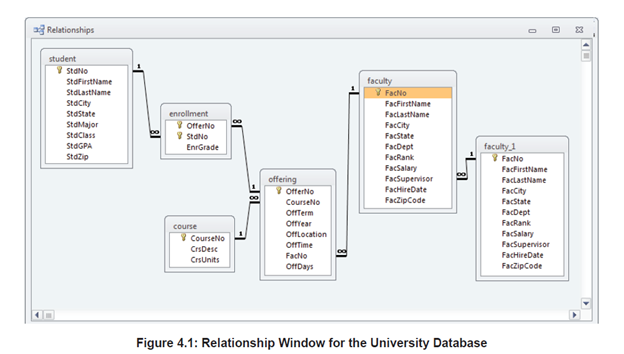

# SINGLE TABLE

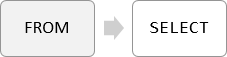

A) Retrieve all columns from a table

In [ ]:
#Query 1- List all columns and rows of the Faculty table.
# * display all fields (columns) for selected table
txt='''
SELECT *
FROM Faculty
'''
Q1 =  psql.sqldf(txt)
Q1

,FacNo,FacFirstName,FacLastName,FacCity,FacState,FacDept,FacRank,FacSalary
0,098-76-5432,LEONARD,VINCE,SEATTLE,WA,MS,ASST,35000
1,543-21-0987,VICTORIA,EMMANUEL,BOTHELL,WA,MS,PROF,120000
2,654-32-1098,LEONARD,FIBON,SEATTLE,WA,MS,ASSC,70000
3,765-43-2109,NICKI,MACON,BELLEVUE,WA,FIN,PROF,65000
4,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,MS,ASST,40000
5,987-65-4321,JULIA,MILLS,SEATTLE,WA,FIN,ASSC,75000


In [ ]:
#Query 1- List all columns and rows of the Student table.
# * display all fields (columns) for selected table
txt='''
SELECT *
FROM Student
'''
Q1 =  psql.sqldf(txt)
Q1

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,123-45-6789,HOMER,WELLS,SEATTLE,WA,98121-1111,IS,FR,3.0
1,124-56-7890,BOB,NORBERT,BOTHELL,WA,98011-2121,FIN,JR,2.7
2,234-56-7890,CANDY,KENDALL,TACOMA,WA,99042-3321,ACCT,JR,3.5
3,345-67-8901,WALLY,KENDALL,SEATTLE,WA,98123-1141,IS,SR,2.8
4,456-78-9012,JOE,ESTRADA,SEATTLE,WA,98121-2333,FIN,SR,3.2
5,567-89-0123,MARIAH,DODGE,SEATTLE,WA,98114-0021,IS,JR,3.6
6,678-90-1234,TESS,DODGE,REDMOND,WA,98116-2344,ACCT,SO,3.3
7,789-01-2345,ROBERTO,MORALES,SEATTLE,WA,98121-2212,FIN,JR,2.5
8,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,98114-1332,IS,SR,4.0
9,890-12-3456,LUKE,BRAZZI,SEATTLE,WA,98116-0021,IS,SR,2.2


B) Retrieve some columns of a table example

In [ ]:
#Query 2- List Faculty Name and Surname
txt='''
SELECT FacFirstName,	FacLastName
FROM Faculty'''
Q2 =  psql.sqldf(txt)
Q2

,FacFirstName,FacLastName
0,LEONARD,VINCE
1,VICTORIA,EMMANUEL
2,LEONARD,FIBON
3,NICKI,MACON
4,CRISTOPHER,COLAN
5,JULIA,MILLS


C) Filter the result set- Exact Matching on a String Column with the = Operator

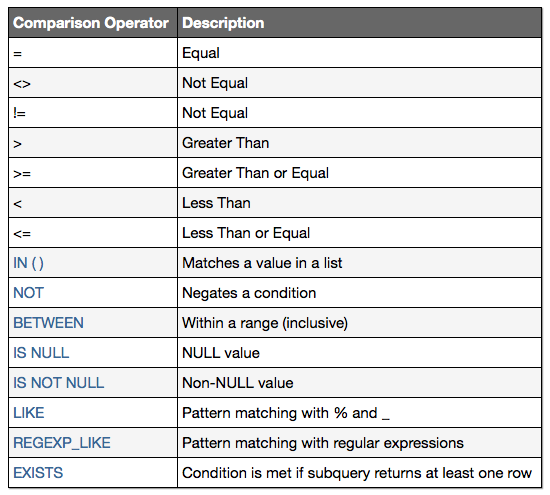

In [ ]:
#Query 3-List all columns of the course row with IS480 as the course number.
txt='''
SELECT *
FROM Course
WHERE Courseno =  'IS480'
'''
Q3 =  psql.sqldf(txt)
Q3

,CourseNo,CrsDesc,CrsUnits
0,IS480,FUNDAMENTALS OF DATABASE MANAGEMENT,4


In [ ]:

txt='''
SELECT *
FROM Faculty
WHERE FacFirstName =  'JULIA'
'''
Q3 =  psql.sqldf(txt)
Q3

,FacNo,FacFirstName,FacLastName,FacCity,FacState,FacDept,FacRank,FacSalary
0,987-65-4321,JULIA,MILLS,SEATTLE,WA,FIN,ASSC,75000


In [ ]:
#Q4-List the offer number, course number, and faculty number for course
# offerings scheduled in fall 2016.
txt='''
SELECT OfferNo,	CourseNo,	FacNo
FROM Offering
WHERE (OffYear='2016' and OffTerm='FALL')
'''
Q4 =  psql.sqldf(txt)
Q4

,OfferNo,CourseNo,FacNo
0,1234,IS320,098-76-5432
1,4321,IS320,098-76-5432


In [ ]:
#Query 5-List the offer number, course number, and faculty number
#for course offerings scheduled in Fall 2016 or Winter 2017.
txt='''
SELECT OfferNo, CourseNo, FacNo
FROM Offering
WHERE (OffTerm = 'FALL' AND OffYear = 2016)
OR (OffTerm = 'WINTER' AND OffYear = 2017)
'''
Q5 =  psql.sqldf(txt)
Q5

,OfferNo,CourseNo,FacNo
0,1234,IS320,098-76-5432
1,4321,IS320,098-76-5432
2,4444,IS320,543-21-0987
3,5555,FIN300,765-43-2109
4,5678,IS480,987-65-4321
5,6666,FIN450,987-65-4321


In [ ]:
#Query 6- List the offering number and course number of summer 2017 offerings without an assigned instructor.
#Note: A field with a NULL value is a field with no value.
#IS NULL  or IS NOT NULL is used to filter a field with no value or with value respectively.
txt='''
SELECT OfferNo, CourseNo
FROM Offering
WHERE (OffTerm = 'SUMMER' AND OffYear = 2017) AND
FacNo is NULL
'''
Q6 =  psql.sqldf(txt)
Q6

,OfferNo,CourseNo
0,1111,IS320


D) Filter the result set with Comparision Operators

In [ ]:
#Query 7- Retrieve the name, city, and grade point average (GPA) of students
# with a high GPA (greater than or equal to 3.7).
txt='''
SELECT StdFirstName, StdCity, StdGPA
FROM Student
WHERE (StdGPA>= 3.7)
'''
Q7 =  psql.sqldf(txt);Q7

,StdFirstName,StdCity,StdGPA
0,CRISTOPHER,SEATTLE,4.0
1,WILLIAM,BOTHELL,3.8


In [ ]:
#Q8- Retrieve the information of faculty whose salary is less than 75000 $
txt='''
SELECT *
FROM Faculty
WHERE (FacSalary<75000)
'''
Q8 =  psql.sqldf(txt)
Q8

,FacNo,FacFirstName,FacLastName,FacCity,FacState,FacDept,FacRank,FacSalary
0,098-76-5432,LEONARD,VINCE,SEATTLE,WA,MS,ASST,35000
1,654-32-1098,LEONARD,FIBON,SEATTLE,WA,MS,ASSC,70000
2,765-43-2109,NICKI,MACON,BELLEVUE,WA,FIN,PROF,65000
3,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,MS,ASST,40000


E) IN and NOT IN - Exact Matching on a String Column with the IN and NOT IN

In [ ]:
#Query 9- Show all information of Junior ('JR') or sophomore ('SO') student.
txt='''
SELECT *
FROM Student
WHERE (StdClass='JR') OR (StdClass='SO')
'''
Q9 =  psql.sqldf(txt)
Q9

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,124-56-7890,BOB,NORBERT,BOTHELL,WA,98011-2121,FIN,JR,2.7
1,234-56-7890,CANDY,KENDALL,TACOMA,WA,99042-3321,ACCT,JR,3.5
2,567-89-0123,MARIAH,DODGE,SEATTLE,WA,98114-0021,IS,JR,3.6
3,678-90-1234,TESS,DODGE,REDMOND,WA,98116-2344,ACCT,SO,3.3
4,789-01-2345,ROBERTO,MORALES,SEATTLE,WA,98121-2212,FIN,JR,2.5
5,901-23-4567,WILLIAM,PILGRIM,BOTHELL,WA,98113-1885,IS,SO,3.8


In [ ]:
#Query 10-Show all information of student whose major are not Accounting ('ACCT') or Finance ('FIN')
txt='''
SELECT *
FROM Student
WHERE (StdMajor='ACCT') OR (StdMajor='FIN')
'''
Q10=  psql.sqldf(txt)
Q10

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,124-56-7890,BOB,NORBERT,BOTHELL,WA,98011-2121,FIN,JR,2.7
1,234-56-7890,CANDY,KENDALL,TACOMA,WA,99042-3321,ACCT,JR,3.5
2,456-78-9012,JOE,ESTRADA,SEATTLE,WA,98121-2333,FIN,SR,3.2
3,678-90-1234,TESS,DODGE,REDMOND,WA,98116-2344,ACCT,SO,3.3
4,789-01-2345,ROBERTO,MORALES,SEATTLE,WA,98121-2212,FIN,JR,2.5


In [ ]:
#Alternative Query 10-Show all information of student whose major
#are not Accounting ('ACCT') or Finance ('FIN')
txt='''
SELECT *
FROM Student
WHERE (StdMajor!='ACCT') AND (StdMajor!='FIN')
'''
Q10A =  psql.sqldf(txt)
Q10A

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,123-45-6789,HOMER,WELLS,SEATTLE,WA,98121-1111,IS,FR,3.0
1,345-67-8901,WALLY,KENDALL,SEATTLE,WA,98123-1141,IS,SR,2.8
2,567-89-0123,MARIAH,DODGE,SEATTLE,WA,98114-0021,IS,JR,3.6
3,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,98114-1332,IS,SR,4.0
4,890-12-3456,LUKE,BRAZZI,SEATTLE,WA,98116-0021,IS,SR,2.2
5,901-23-4567,WILLIAM,PILGRIM,BOTHELL,WA,98113-1885,IS,SO,3.8


F) Eliminating Duplicates with DISTINCT

In [ ]:
#Query 11-List the city and state of faculty members.
txt='''
SELECT FacCity, FacState
FROM Faculty
'''
Q11 =  psql.sqldf(txt)
Q11

,FacCity,FacState
0,SEATTLE,WA
1,BOTHELL,WA
2,SEATTLE,WA
3,BELLEVUE,WA
4,SEATTLE,WA
5,SEATTLE,WA


In [ ]:
#Query 12- List the unique city and state combinations in the Faculty table.
txt='''
SELECT DISTINCT FacCity, FacState
FROM Faculty
'''
Q12 =  psql.sqldf(txt)
Q12

,FacCity,FacState
0,SEATTLE,WA
1,BOTHELL,WA
2,BELLEVUE,WA


G) Inexact Matching with the LIKE Operator Example

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:

 The percent sign (%) represents zero, one, or multiple characters.
 The underscore sign (_) represents one, single character

Note: MS Access uses an asterisk (*) instead of the percent sign (%), and a question mark (?) instead of the underscore (_).

In [ ]:
#Query 13. List the senior-level IS courses. (Courses with starts with IS4)
txt='''
SELECT *
FROM Course
WHERE CourseNo LIKE 'IS4%'
'''
Q13 =  psql.sqldf(txt)
Q13

,CourseNo,CrsDesc,CrsUnits
0,IS460,SYSTEMS ANALYSIS,4
1,IS470,BUSINESS DATA COMMUNICATIONS,4
2,IS480,FUNDAMENTALS OF DATABASE MANAGEMENT,4


In [ ]:
#Query 14. List the courses containing the string “DATA” in the course description.
txt='''
SELECT *
FROM Course
WHERE CrsDesc LIKE '%DATA%'
'''
Q14 =  psql.sqldf(txt)
Q14

,CourseNo,CrsDesc,CrsUnits
0,IS470,BUSINESS DATA COMMUNICATIONS,4
1,IS480,FUNDAMENTALS OF DATABASE MANAGEMENT,4


In [ ]:
#Query 15. List the name and rank of faculty with a five letter last name ending in “N”. Each question mark matches any single character.
txt='''
SELECT *
FROM Faculty
WHERE FacLastName LIKE '____N'
'''
Q15 =  psql.sqldf(txt)
Q15

,FacNo,FacFirstName,FacLastName,FacCity,FacState,FacDept,FacRank,FacSalary
0,654-32-1098,LEONARD,FIBON,SEATTLE,WA,MS,ASSC,70000
1,765-43-2109,NICKI,MACON,BELLEVUE,WA,FIN,PROF,65000
2,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,MS,ASST,40000


H) Sorting with Order By

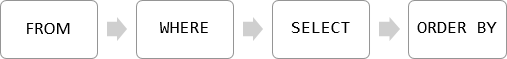

In [ ]:
#Query 16. -List the GPA, name, city, and state of juniors. Order the result by GPA in ascending order.
txt='''
SELECT StdGPA, StdFirstName, StdCity, StdState
FROM Student
WHERE StdClass='JR'
ORDER BY StdGPA
'''
Q16 =  psql.sqldf(txt)
Q16

,StdGPA,StdFirstName,StdCity,StdState
0,2.5,ROBERTO,SEATTLE,WA
1,2.7,BOB,BOTHELL,WA
2,3.5,CANDY,TACOMA,WA
3,3.6,MARIAH,SEATTLE,WA


In [ ]:
#Query 17. List the rank, salary, name, and department of faculty. Order the result by ascending (alphabetic)
# rank and descending salary.
txt='''
SELECT FacRank, FacSalary, FacFirstName, FacLastName,FacDept
FROM Faculty
ORDER BY FacRank, FacSalary DESC
'''
Q17 =  psql.sqldf(txt)
Q17

,FacRank,FacSalary,FacFirstName,FacLastName,FacDept
0,ASSC,75000,JULIA,MILLS,FIN
1,ASSC,70000,LEONARD,FIBON,MS
2,ASST,40000,CRISTOPHER,COLAN,MS
3,ASST,35000,LEONARD,VINCE,MS
4,PROF,120000,VICTORIA,EMMANUEL,MS
5,PROF,65000,NICKI,MACON,FIN


I)	Aggregate Function

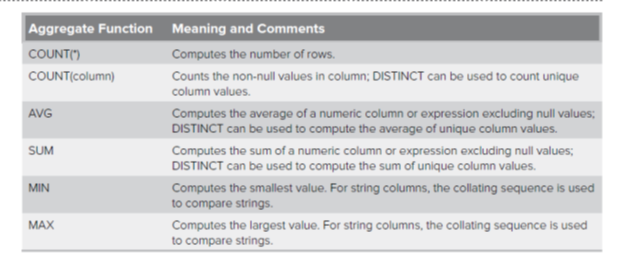

In [ ]:
#Query 18. What is the average, minimum, maximum salary of Faculty ? How many faculties are there?
txt='''
SELECT min(FacSalary) AS MinSalary, max(FacSalary) as MaxSalary, avg(FacSalary) As Salary, count(*) As NumberofFaculty
FROM Faculty
'''
Q18 =  psql.sqldf(txt)
Q18

,MinSalary,MaxSalary,Salary,NumberofFaculty
0,35000,120000,67500.0,6


J) Summarizing Tables with GROUP BY and HAVING

In [ ]:
#Query 19. Summarize the averageGPA of students by major.
txt='''
SELECT StdMajor, avg(StdGPA) AS AverageGPA
From Student
GROUP BY StdMajor
'''
Q19 =  psql.sqldf(txt)
Q19

,StdMajor,AverageGPA
0,ACCT,3.400000
1,FIN,2.800000
2,IS,3.233333


In [ ]:
#Query 20. Summarize the number of offerings by year.
txt='''
SELECT OffYear, COUNT(*) AS NumOfferings
FROM Offering
GROUP BY OffYear
'''
Q20 =  psql.sqldf(txt)
Q20

,OffYear,NumOfferings
0,2016,3
1,2017,10


In [ ]:
#Query 21. Summarize the number of offerings by year.
#Summarize the average GPA of upper division (junior or senior) students by major.
txt='''
SELECT StdMajor, avg(StdGPA) AS AvgGPA
FROM Student
WHERE StdClass='JR' OR 'SR'
GROUP BY StdMajor
'''
Q21 =  psql.sqldf(txt)
Q21

,StdMajor,AvgGPA
0,ACCT,3.5
1,FIN,2.6
2,IS,3.6


In [ ]:
#Query 22 Summarize the minimum and maximum GPA of students by major and class.
txt='''
SELECT StdMajor, StdClass, min(StdGPA) AS MinGPA, max(StdGPA) AS MaxGPA
FROM Student
GROUP BY StdMajor, StdClass
'''
Q22 =  psql.sqldf(txt)
Q22

,StdMajor,StdClass,MinGPA,MaxGPA
0,ACCT,JR,3.5,3.5
1,ACCT,SO,3.3,3.3
2,FIN,JR,2.5,2.7
3,FIN,SR,3.2,3.2
4,IS,FR,3.0,3.0
5,IS,JR,3.6,3.6
6,IS,SO,3.8,3.8
7,IS,SR,2.2,4.0


In [ ]:
#Query 23. List the number of upper-division students(junior or senior) and their average GPA.
txt='''
SELECT COUNT(*) AS StdCount, AVG(StdGPA) AS AvgGPA
FROM Student
WHERE StdClass IN ('JR', 'SR')
'''
Q23=  psql.sqldf(txt)
Q23

,StdCount,AvgGPA
0,8,3.0625


In [ ]:
#Query 24. Summarize the average GPA of upper-division (junior or senior) students by major.
# Only list the majors with average GPA greater than 3.1.
#Note: HAVING Reminder: the HAVING clause must be preceded by the GROUP BY clause.
txt='''
SELECT StdMajor, COUNT(*) AS StdCount, AVG(StdGPA) AS AvgGPA
FROM Student
WHERE StdClass IN ('JR', 'SR')
GROUP BY StdMajor
HAVING avg(StdGPA)>3.1
'''
Q24=  psql.sqldf(txt)
Q24

,StdMajor,StdCount,AvgGPA
0,ACCT,1,3.50
1,IS,4,3.15
